In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import natsort
from sklearn.model_selection import train_test_split
import tensorflow as tf
cwd = os.getcwd()
import os
cwd = os.getcwd()
import cv2
# function for face detection with mtcnn
from tensorflow.keras.utils import to_categorical
from keras.metrics import MeanIoU
from sklearn.utils import compute_class_weight
from sklearn.utils import class_weight

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,Conv2D,Dropout,MaxPooling2D,Conv2DTranspose,concatenate

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

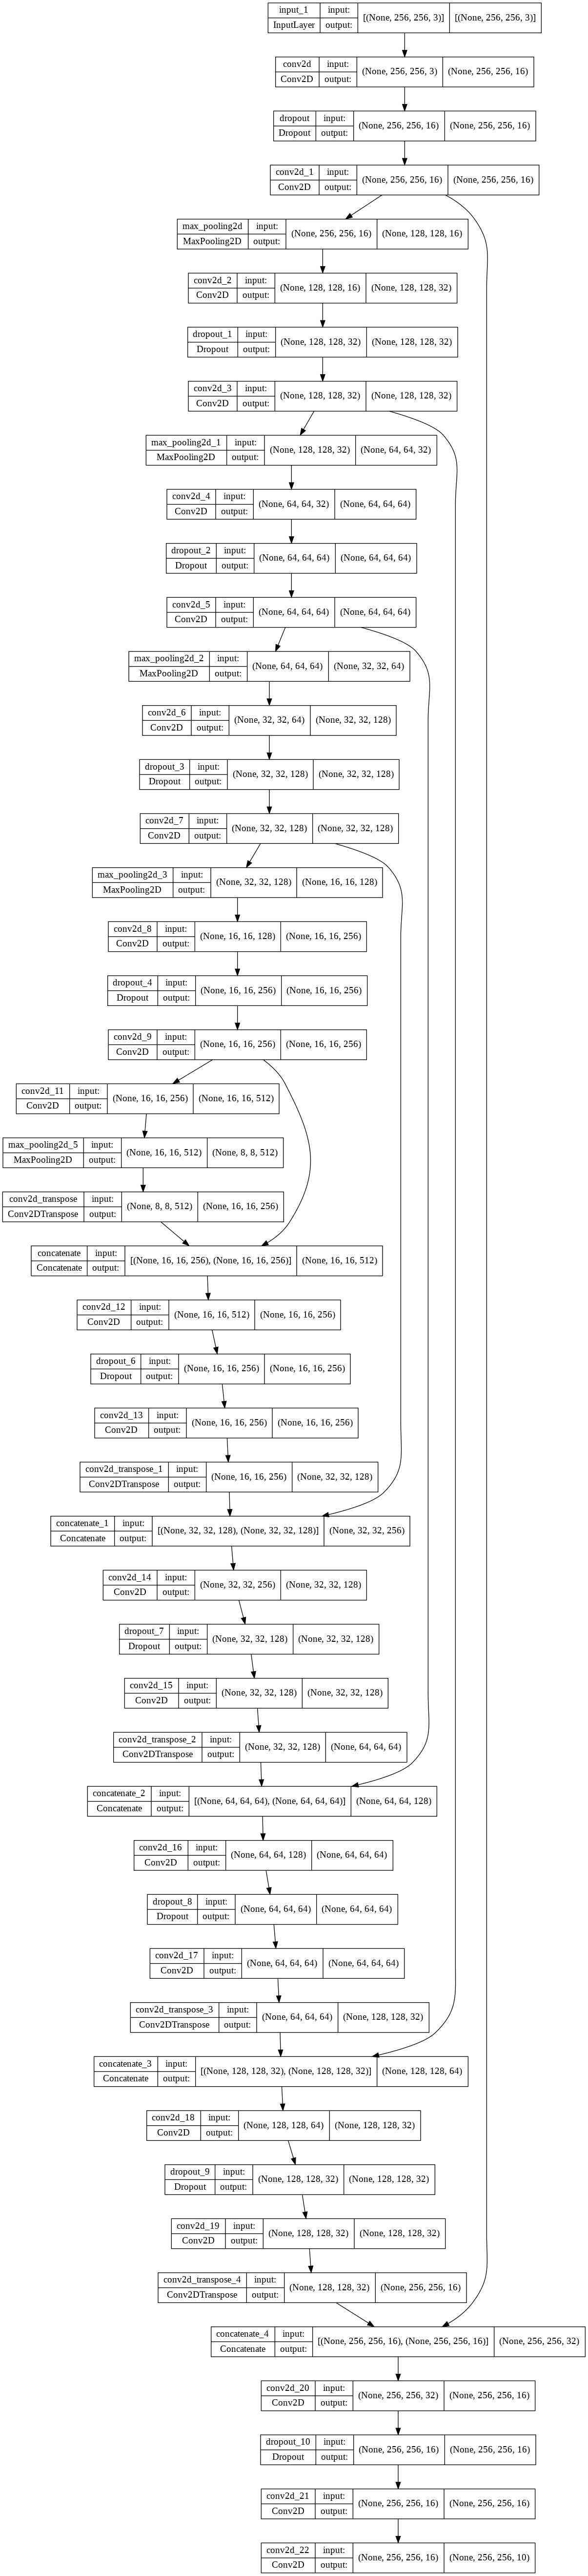

In [ ]:

NUM_CLASS=10
IMG_WIDTH = 256   
IMG_HEIGHT = 256
IMG_CHANNELS = 3

#Build the model
inputs =Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

#Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)
 
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)
 
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.2)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = MaxPooling2D(pool_size=(2, 2))(c5)

c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c6 = Dropout(0.2)(c5)
c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p6 = MaxPooling2D(pool_size=(2, 2))(c6)


#Expansive path

u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(p6)
u7 = concatenate([u7, c5])
c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.3)(c7)
c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c4])
c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.2)(c8)
c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c3])
c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.2)(c9)
c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
u10 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c9)
u10 = concatenate([u10, c2])
c10 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
c10 = Dropout(0.1)(c10)
c10 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)
 
u11 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c10)
u11 = concatenate([u11, c1], axis=3)
c11 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u11)
c11 = Dropout(0.1)(c11)
c11 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)
 
outputs = Conv2D(10, (1, 1), activation='sigmoid')(c11)
 
myModel_binaryClass = tf.keras.Model(inputs=[inputs], outputs=[outputs])
myModel_binaryClass.summary()

plot_model(myModel_binaryClass, to_file='myModel_binaryClass.png',show_shapes=True, show_layer_names=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mainDir='/content/drive/MyDrive/Data/Non-Flooded/Labeled/Non-Flooded'

In [ ]:
###############################################3
"""
data prepare
"""
dataDir=mainDir+'/image/'
labelDir=mainDir+'/mask/'
labelDirList=natsort.natsorted(os.listdir(labelDir),reverse=False)

dataDirList=natsort.natsorted(os.listdir(dataDir),reverse=False)
allData=[]
for items in range(len(dataDirList)):
    dataPath=dataDir+'/'+dataDirList[items]
    item = dataDirList[items]
    dataPart = item.split('.')
    print("item****************",dataPart[0])
    for labels in labelDirList:
      maskPart = labels.split('_')
      print("label**************",maskPart[0])
      # print(labelDirList[items])
      # oneImg = cv2.cvtColor(oneImg, cv2.COLOR_BGR2RGB)
      # plt.imshow(oneImg)
      if dataPart[0] == maskPart[0]:
        oneImg=cv2.imread(dataPath)
        oneImg=cv2.resize(oneImg, (IMG_WIDTH,IMG_HEIGHT))
        oneImg=oneImg/255
        allData.append(oneImg)
    
allData=np.array(allData)

Streaming output truncated to the last 5000 lines.
label************** 6651
label************** 6656
label************** 6667
label************** 6682
label************** 6692
label************** 6693
label************** 6727
label************** 6731
label************** 6734
label************** 6735
label************** 6742
label************** 6747
label************** 6750
label************** 6773
label************** 6788
label************** 6792
label************** 6802
label************** 6804
label************** 6808
label************** 6812
label************** 6824
label************** 6829
label************** 6832
label************** 6836
label************** 6838
label************** 6839
label************** 6843
label************** 6854
label************** 6855
label************** 6860
label************** 6919
label************** 6924
label************** 6938
label************** 6953
label************** 6955
label************** 6960
label************** 6964
label************** 6978

In [ ]:
labelDir=mainDir+'/mask/'
labelDirList=natsort.natsorted(os.listdir(labelDir),reverse=False)

allLabel=[]
for items in range(len(labelDirList)):
    labelPath=labelDir+'/'+labelDirList[items]
    labelPart = labelDirList[items].split('_')

    for data in dataDirList:
      dataPart = data.split('.')
      if dataPart[0]==labelPart[0]:
        # print(labelDirList[items])
        oneImg=cv2.imread(labelPath,0)
        oneImg=cv2.resize(oneImg, (IMG_WIDTH,IMG_HEIGHT))

        # plt.imshow(oneImg)
        # print(np.unique(oneImg))
        
        allLabel.append(oneImg)

allLabel=np.array(allLabel)

In [ ]:
# allLabel_cat = np.expand_dims(allLabel_cat, axis=3)
X_train, X_test, y_train, y_test  = train_test_split(
                    allData, allLabel, test_size = 0.10, random_state = 0,shuffle=True)

y_train_cat = to_categorical(y_train, num_classes=NUM_CLASS)
y_test_cat = to_categorical(y_test, num_classes=NUM_CLASS)

In [ ]:
###################################################
"""
train model
"""
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam

##for binary class 
myModel_binaryClass.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#for multiclass
# myModel_multiClass.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy',metrics=[MeanIoU(num_classes=2)])
myModel_binaryClass.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

history = myModel_binaryClass.fit(X_train, y_train_cat, batch_size = 4, verbose=1, epochs=100, validation_split=0.1)

Epoch 1/100
67/67 [==============================] - 26s 176ms/step - loss: 1.4647 - accuracy: 0.5948 - val_loss: 1.0094 - val_accuracy: 0.6856
Epoch 2/100
67/67 [==============================] - 9s 134ms/step - loss: 1.0749 - accuracy: 0.6233 - val_loss: 0.9192 - val_accuracy: 0.6989
Epoch 3/100
67/67 [==============================] - 9s 134ms/step - loss: 0.9672 - accuracy: 0.6479 - val_loss: 0.8708 - val_accuracy: 0.7114
Epoch 4/100
67/67 [==============================] - 9s 135ms/step - loss: 0.9169 - accuracy: 0.6624 - val_loss: 0.8536 - val_accuracy: 0.6889
Epoch 5/100
67/67 [==============================] - 9s 134ms/step - loss: 0.8918 - accuracy: 0.6681 - val_loss: 0.8366 - val_accuracy: 0.7047
Epoch 6/100
67/67 [==============================] - 9s 134ms/step - loss: 0.8826 - accuracy: 0.6719 - val_loss: 0.8087 - val_accuracy: 0.7154
Epoch 7/100
67/67 [==============================] - 9s 134ms/step - loss: 0.8448 - accuracy: 0.6927 - val_loss: 0.8278 - val_accuracy: 0.701

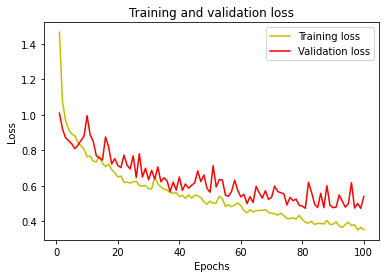

In [ ]:
  #plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

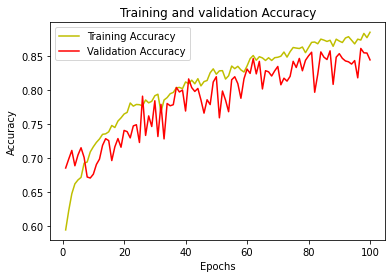

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
result=myModel_binaryClass.evaluate(X_test, y_test_cat)

print('acc========',result[1]*100)

2/2 [==============================] - 3s 27ms/step - loss: 0.6792 - accuracy: 0.8023
acc======== 80.23029565811157


In [ ]:
y_pred=myModel_binaryClass.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


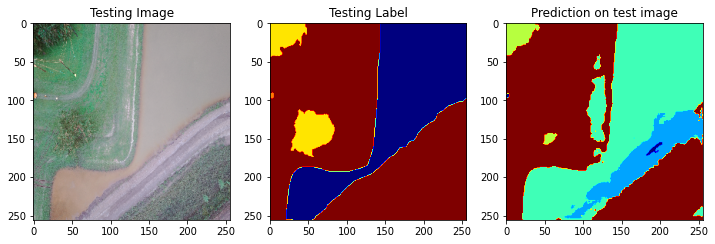

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(X_test[10], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(y_test[10], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(y_pred_argmax[10], cmap='jet')
plt.show()

In [ ]:
#IOU
###iou=tp/(tp+fp+fn)
##################################################

#Using built in keras function
from keras.metrics import MeanIoU
IOU_keras = MeanIoU(num_classes=NUM_CLASS)  
IOU_keras.update_state(y_test, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.31107944


In [ ]:
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(NUM_CLASS, NUM_CLASS)
# print(values)

class0_IoU=values[0,0]/(np.sum(values[0,:])+np.sum(values[:,0])-values[0,0])
class1_IoU=values[1,1]/(np.sum(values[1,:])+np.sum(values[:,1])-values[1,1])
class2_IoU=values[2,2]/(np.sum(values[2,:])+np.sum(values[:,2])-values[2,2])
class3_IoU=values[3,3]/(np.sum(values[3,:])+np.sum(values[:,3])-values[3,3])
class4_IoU=values[4,4]/(np.sum(values[4,:])+np.sum(values[:,4])-values[4,4])
class5_IoU=values[5,5]/(np.sum(values[5,:])+np.sum(values[:,5])-values[5,5])
class6_IoU=values[6,6]/(np.sum(values[6,:])+np.sum(values[:,6])-values[6,6])
class7_IoU=values[7,7]/(np.sum(values[7,:])+np.sum(values[:,7])-values[7,7])
class8_IoU=values[8,8]/(np.sum(values[8,:])+np.sum(values[:,8])-values[8,8])
class9_IoU=values[9,9]/(np.sum(values[9,:])+np.sum(values[:,9])-values[9,9])

print("IoU for class1 is: ", class0_IoU)
print("IoU for class2 is: ", class1_IoU)
print("IoU for class3 is: ", class2_IoU)
print("IoU for class4 is: ", class3_IoU)
print("IoU for class5 is: ", class4_IoU)
print("IoU for class6 is: ", class5_IoU)
print("IoU for class7 is: ", class6_IoU)
print("IoU for class8 is: ", class7_IoU)
print("IoU for class9 is: ", class8_IoU)
print("IoU for class10 is: ", class9_IoU)


sumAllIOU=class0_IoU+class1_IoU+class2_IoU+class3_IoU+class4_IoU+class5_IoU+class6_IoU+class7_IoU+class8_IoU+class9_IoU
print('\n mean of all iou',sumAllIOU/10)

IoU for class1 is:  0.0
IoU for class2 is:  0.0
IoU for class3 is:  0.41765243
IoU for class4 is:  0.0
IoU for class5 is:  0.46769166
IoU for class6 is:  0.49725047
IoU for class7 is:  0.59986895
IoU for class8 is:  0.10043942
IoU for class9 is:  0.22778998
IoU for class10 is:  0.8001016

 mean of all iou 0.31107943058013915
